In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 12)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
China_df = country_df[country_df.Country == 'US'].set_index('Date')
world_without_China = pd.DataFrame({col:W[col] - China_df[col] for col in ['Confirmed', 'Recovered', 'Deaths']})
world_without_China['Country'] = ['World without US' for _ in range(len(world_without_China))]
world_without_China['Date'] = world_without_China.index
country_df = country_df.append(world_without_China)

In [7]:
country_df['Date'] = pd.to_datetime(country_df.Date)
country_df['Removed'] = country_df.Recovered + country_df.Deaths
#country_df['Removed'] = country_df.Confirmed.shift(periods = 14)
country_df['Active'] = country_df.Confirmed - country_df.Removed
country_df['Mortality'] = country_df.Deaths/country_df.Removed
country_df['Part_Active'] = country_df.Active/country_df.Confirmed

In [8]:
last_day = dt.date.today() - dt.timedelta(days=1)
Last_day_df = country_df[country_df.Date == last_day].set_index('Country')
Last_day_df = Last_day_df[Last_day_df.Confirmed>5000]

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


In [9]:
C = ['Confirmed', 'Active', 'Removed', 'Recovered', 'Deaths', 'Mortality', 'Part_Active']

In [10]:
Important_countries = ['India', 'World', 'World without US',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'United Kingdom', 'France',
                      'Korea, South', 'Iran'][::-1]
DF_Dict = {country: country_df[country_df.Country == country].set_index('Date').drop(columns = ['Country'])
                        for country in Last_day_df.index}

In [11]:
Last_day_df[Last_day_df.index.isin(Important_countries)]

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
China,83787,2020-04-18,4636,77614,82250,1537,0.056365,0.018344
France,149149,2020-04-18,19345,36587,55932,93217,0.345866,0.624992
Germany,143342,2020-04-18,4459,85400,89859,53483,0.049622,0.373115
India,15722,2020-04-18,521,2463,2984,12738,0.174598,0.810202
Iran,80868,2020-04-18,5031,55987,61018,19850,0.082451,0.245462
Italy,175925,2020-04-18,23227,44927,68154,107771,0.340802,0.612596
"Korea, South",10653,2020-04-18,232,7937,8169,2484,0.028400,0.233174
Spain,191726,2020-04-18,20043,74797,94840,96886,0.211335,0.505336
US,732197,2020-04-18,38664,64840,103504,628693,0.373551,0.858639


In [12]:
Doubling_period = {}
for cun in DF_Dict:
    tr = int(Last_day_df[Last_day_df.index == cun].Confirmed)
    rp = len(DF_Dict[cun][DF_Dict[cun].Confirmed >= tr/2])
    Doubling_period[cun] = [rp]
pd.DataFrame(Doubling_period)[Important_countries].transpose()

,0
Iran,20
"Korea, South",46
France,13
United Kingdom,11
China,69
Spain,19
Italy,22
Germany,19
US,13
World without US,16


In [13]:
Daily_new =  ['Confirmed', 'Removed', 'Recovered', 'Deaths']
d = 14
for cun in Last_day_df.index:
    df = DF_Dict[cun]
    
    #DF_Dict[cun]['Removed'] = DF_Dict[cun].Confirmed.shift(periods = 14)
    DF_Dict[cun]['Active'] = DF_Dict[cun].Confirmed - DF_Dict[cun].Removed
    DF_Dict[cun]['Mortality'] = DF_Dict[cun].Deaths/DF_Dict[cun].Removed
    DF_Dict[cun]['Part_Active'] = DF_Dict[cun].Active/DF_Dict[cun].Confirmed

    for col in Daily_new:
        L = list(df[col])
        K = L[:d] + [L[i+d] - L[i] for i in range(len(df) - d)]
        DF_Dict[cun]['Week_'+col] = K
    DF_Dict[cun]['Week_Mortality'] = DF_Dict[cun]['Week_Deaths']/DF_Dict[cun]['Week_Removed']

In [14]:
DC = DF_Dict['India'].columns
DF_Dict['India'].tail(10)

,Confirmed,Deaths,Recovered,Removed,Active,Mortality,Part_Active,Week_Confirmed,Week_Removed,Week_Recovered,Week_Deaths,Week_Mortality
Date,,,,,,,,,,,,
2020-04-09,6725,226,620,846,5879,0.267139,0.874201,5998,781,575,206,0.263764
2020-04-10,7598,246,774,1020,6578,0.241176,0.865754,6711,927,701,226,0.243797
2020-04-11,8446,288,969,1257,7189,0.229117,0.851172,7459,1149,885,264,0.229765
2020-04-12,9205,331,1080,1411,7794,0.234585,0.846714,8181,1289,985,304,0.235842
2020-04-13,10453,358,1181,1539,8914,0.232619,0.852770,9202,1405,1079,326,0.232028
2020-04-14,11487,393,1359,1752,9735,0.224315,0.847480,10090,1594,1236,358,0.224592
2020-04-15,12322,405,1432,1837,10485,0.220468,0.850917,10324,1631,1284,347,0.212753
2020-04-16,13430,448,1768,2216,11214,0.202166,0.834996,10887,1953,1577,376,0.192524
2020-04-17,14352,486,2041,2527,11825,0.192323,0.823927,11785,2263,1849,414,0.182943


In [15]:
Last_day_df[Last_day_df.index.isin(Important_countries)]

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
China,83787,2020-04-18,4636,77614,82250,1537,0.056365,0.018344
France,149149,2020-04-18,19345,36587,55932,93217,0.345866,0.624992
Germany,143342,2020-04-18,4459,85400,89859,53483,0.049622,0.373115
India,15722,2020-04-18,521,2463,2984,12738,0.174598,0.810202
Iran,80868,2020-04-18,5031,55987,61018,19850,0.082451,0.245462
Italy,175925,2020-04-18,23227,44927,68154,107771,0.340802,0.612596
"Korea, South",10653,2020-04-18,232,7937,8169,2484,0.028400,0.233174
Spain,191726,2020-04-18,20043,74797,94840,96886,0.211335,0.505336
US,732197,2020-04-18,38664,64840,103504,628693,0.373551,0.858639


In [16]:
colors = {'India': 'Blue', 'World': 'Blue', 'World without US': 'Green', 'US': 'Black', 'China': 'red', 'Spain': 'yellow',
         'Italy': 'pink', 'Iran': 'red', 'Ireland': 'violet', 'United Kingdom': 'Purple', 'Korea, South': 'Black',
         'France': 'orange', 'Germany': 'Green'}

def plotwithx(x, cols, DF_Dict = DF_Dict):
    for col in cols:
        if col!=x:
            plt.figure(figsize = (14, 8))
            plt.title(f'{col} with respect to {x}')
            plt.xlabel(x)
            plt.ylabel(col)
            if x in DC:
                plt.xscale('log')
                #plt.xlim(5*10**3, 5*10**6)

            if col not in ['Mortality', 'Part_Active', 'Week_Mortality']:
                plt.yscale('log')
                #plt.ylim(10**1, 10**7)
            for cun in Important_countries:
                df = DF_Dict[cun]#.tail(50)
                if x == 'Date':
                    X = df.index
                else:
                    X = df[x]
                plt.plot(X, 
                         df[col],
                         label = cun,
                         linewidth = 3.5,
                         linestyle = '-.' if 'World' in cun else '-',
                         color = colors[cun], 
                         alpha = 0.6
                        )
            plt.legend(Important_countries)
            plt.plot()


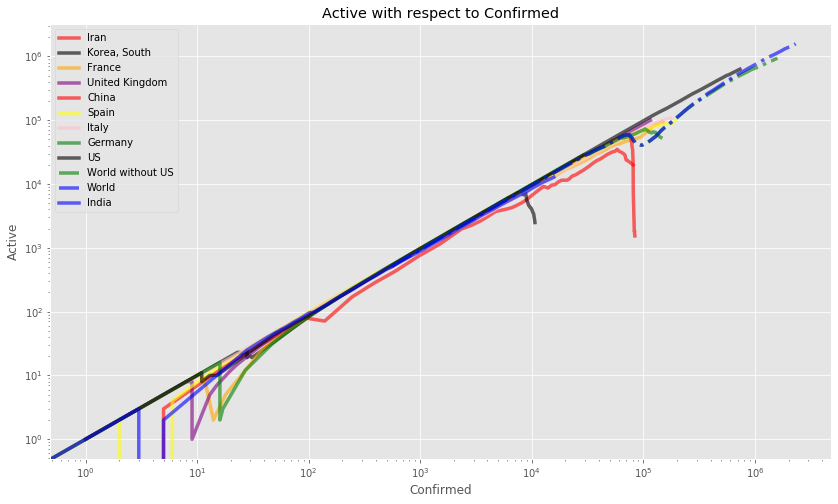

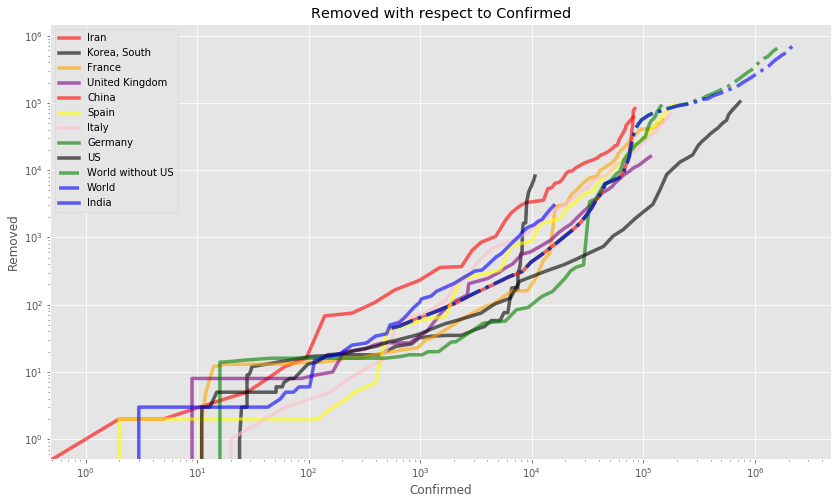

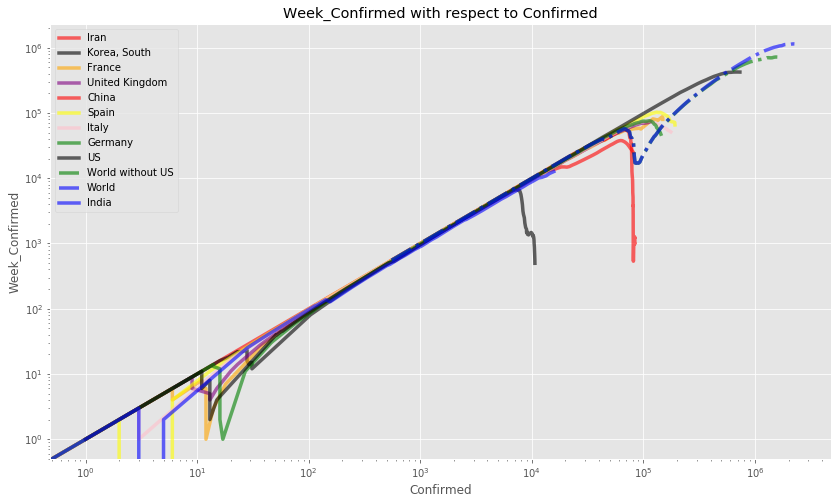

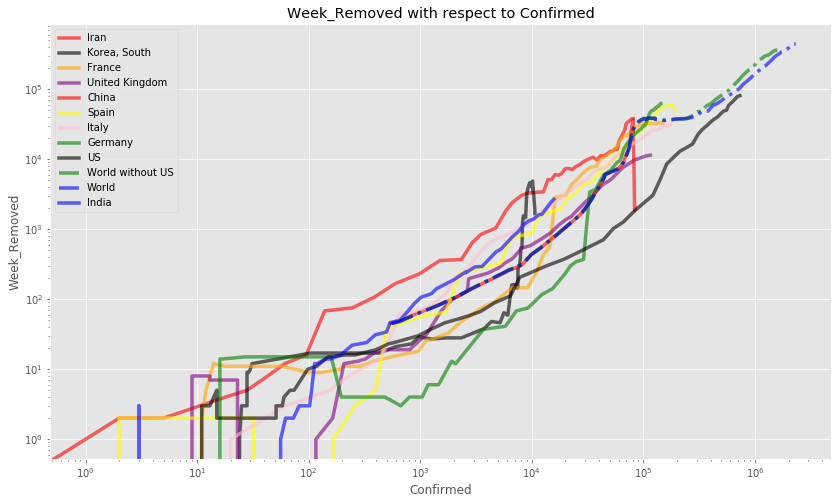

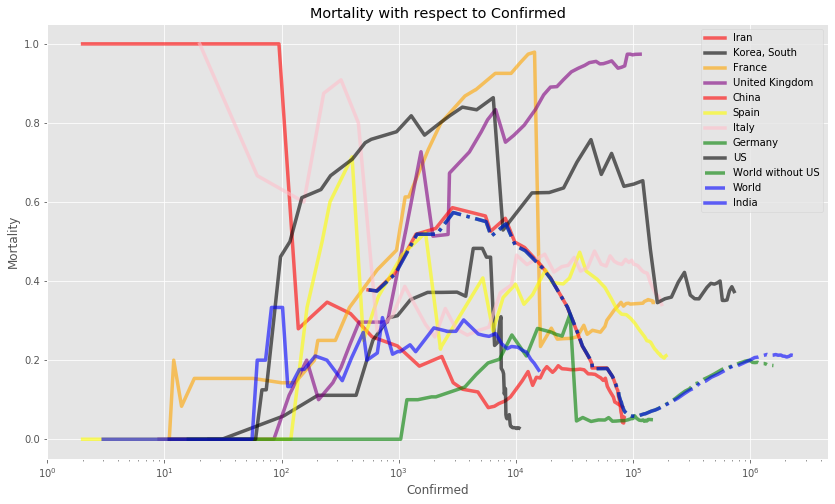

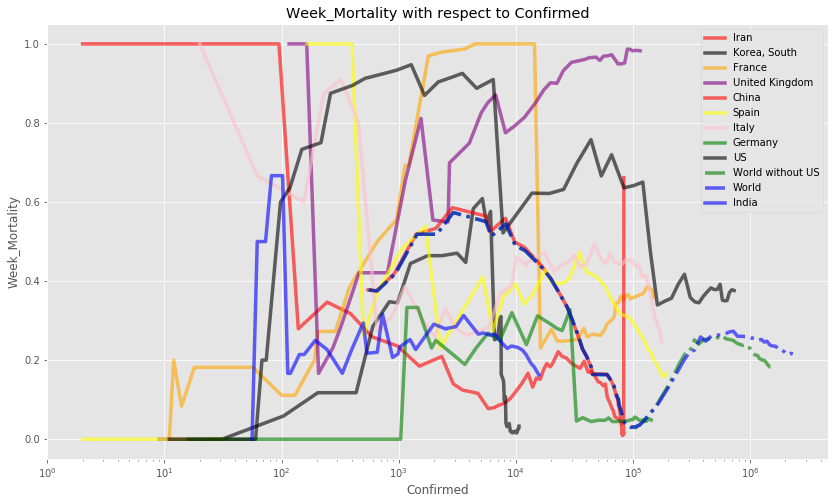

In [17]:
plotwithx('Confirmed', ['Active', 'Removed', 'Week_Confirmed', 'Week_Removed', 'Mortality', 'Week_Mortality'])

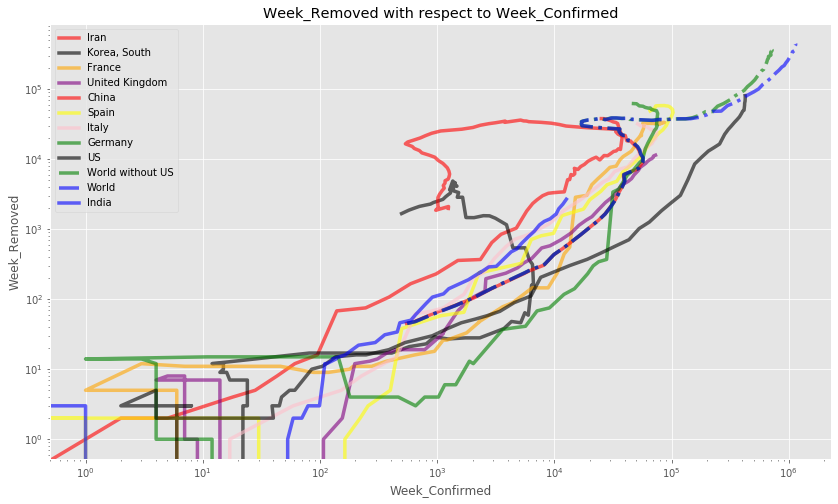

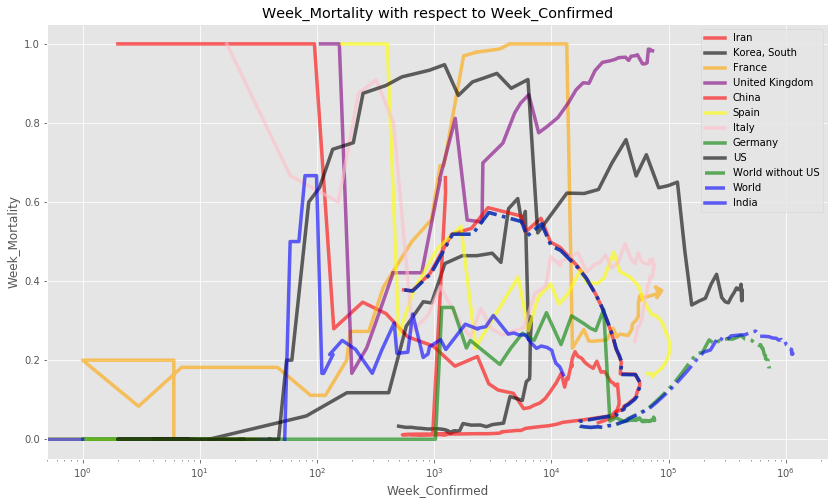

In [18]:
plotwithx('Week_Confirmed', ['Week_Removed', 'Week_Mortality'])

In [19]:
Last_day_df.sort_values('Part_Active', ascending = False)

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
Norway,7036,2020-04-18,164,32,196,6840,0.836735,0.972143
Ireland,14758,2020-04-18,571,77,648,14110,0.881173,0.956092
Portugal,19685,2020-04-18,687,610,1297,18388,0.529684,0.934112
Ukraine,5106,2020-04-18,133,275,408,4698,0.325980,0.920094
Russia,36793,2020-04-18,313,3057,3370,33423,0.092878,0.908406
Qatar,5008,2020-04-18,8,510,518,4490,0.015444,0.896565
Netherlands,31766,2020-04-18,3613,317,3930,27836,0.919338,0.876283
Singapore,5992,2020-04-18,11,740,751,5241,0.014647,0.874666
Japan,10296,2020-04-18,222,1069,1291,9005,0.171960,0.874611


In [20]:
Last_day_df.sort_values('Mortality', ascending = True)

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
Singapore,5992,2020-04-18,11,740,751,5241,0.014647,0.874666
Qatar,5008,2020-04-18,8,510,518,4490,0.015444,0.896565
Australia,6547,2020-04-18,67,4124,4191,2356,0.015987,0.359859
Malaysia,5305,2020-04-18,88,3102,3190,2115,0.027586,0.398680
"Korea, South",10653,2020-04-18,232,7937,8169,2484,0.028400,0.233174
United Arab Emirates,6302,2020-04-18,37,1188,1225,5077,0.030204,0.805617
Chile,9730,2020-04-18,126,4035,4161,5569,0.030281,0.572354
Austria,14671,2020-04-18,443,10214,10657,4014,0.041569,0.273601
Israel,13265,2020-04-18,164,3456,3620,9645,0.045304,0.727101


c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


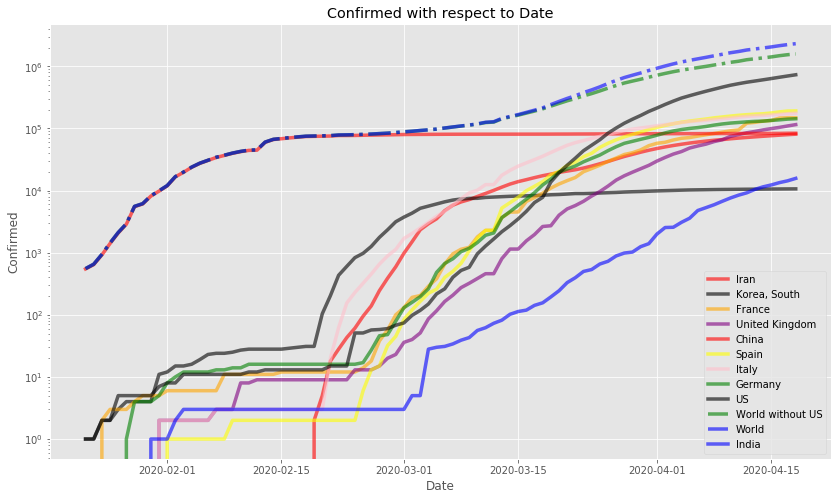

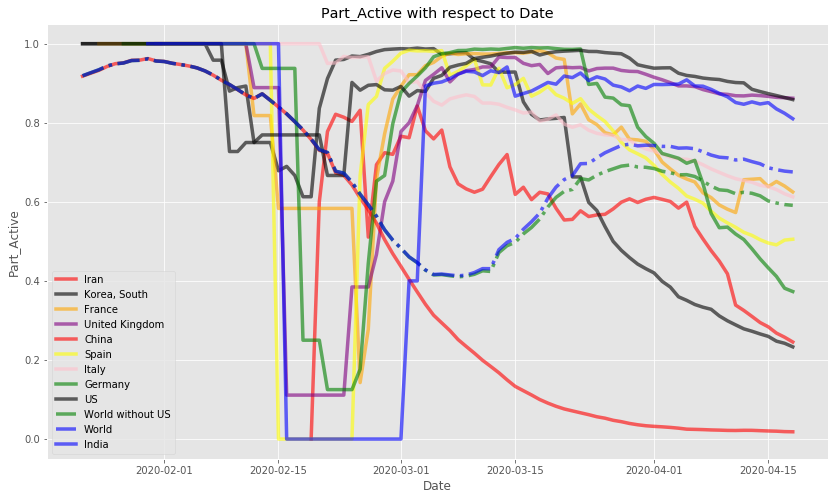

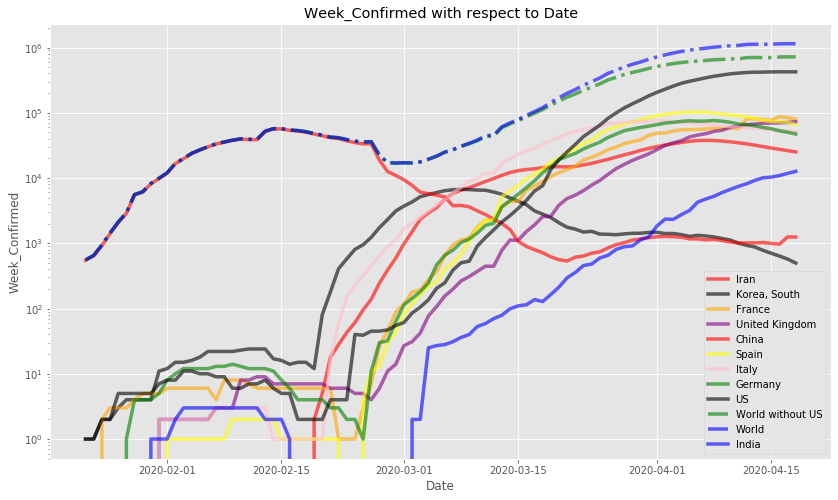

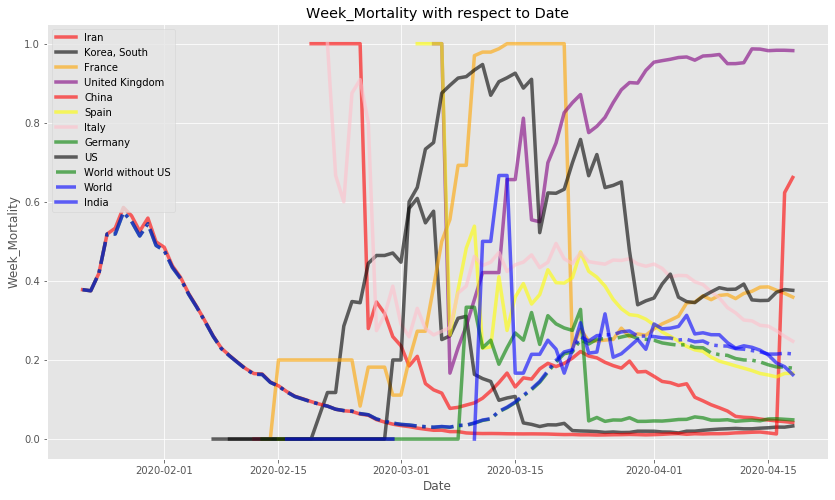

In [21]:
plotwithx('Date', ['Confirmed', 'Part_Active', 'Week_Confirmed', 'Week_Mortality'])

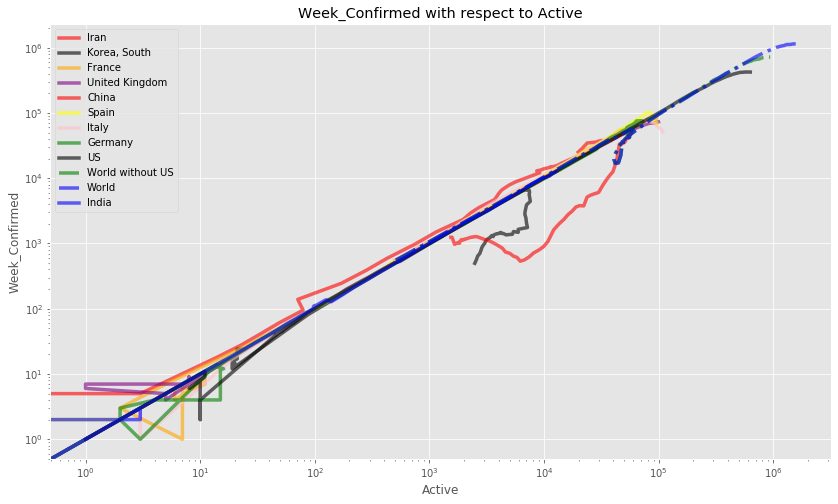

In [22]:
plotwithx('Active', ['Week_Confirmed'])

In [23]:
Removing_period = {}
for cun in DF_Dict:
    tr = int(Last_day_df[Last_day_df.index == cun].Removed)
    rp = len(DF_Dict[cun][DF_Dict[cun].Confirmed >= tr])
    Removing_period[cun] = rp
Removing_period

{'Australia': 20,
 'Austria': 18,
 'Belgium': 18,
 'Brazil': 10,
 'Canada': 16,
 'Chile': 15,
 'China': 19,
 'Czechia': 25,
 'Denmark': 14,
 'Ecuador': 23,
 'France': 18,
 'Germany': 16,
 'India': 15,
 'Indonesia': 21,
 'Iran': 12,
 'Ireland': 30,
 'Israel': 21,
 'Italy': 26,
 'Japan': 25,
 'Korea, South': 34,
 'Malaysia': 16,
 'Mexico': 11,
 'Netherlands': 28,
 'Norway': 41,
 'Pakistan': 18,
 'Peru': 7,
 'Philippines': 22,
 'Poland': 23,
 'Portugal': 28,
 'Qatar': 26,
 'Romania': 19,
 'Russia': 17,
 'Saudi Arabia': 20,
 'Serbia': 20,
 'Singapore': 22,
 'Spain': 19,
 'Sweden': 26,
 'Switzerland': 17,
 'Turkey': 19,
 'US': 22,
 'Ukraine': 21,
 'United Arab Emirates': 16,
 'United Kingdom': 22,
 'World': 20,
 'World without US': 19}

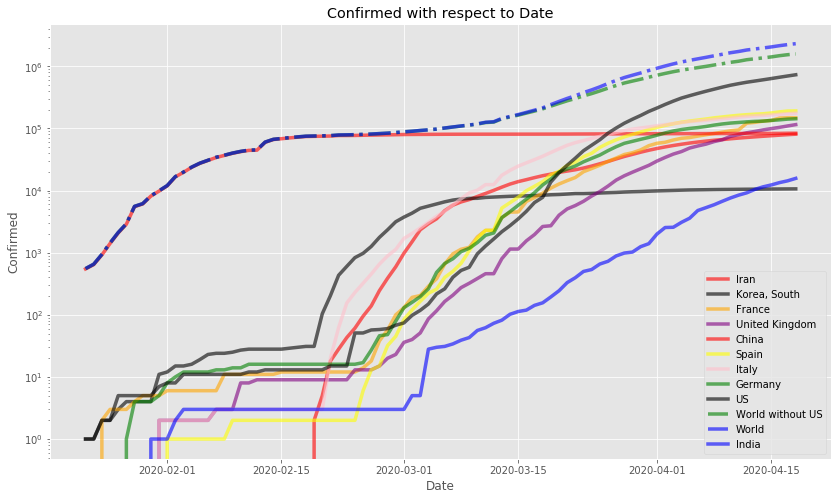

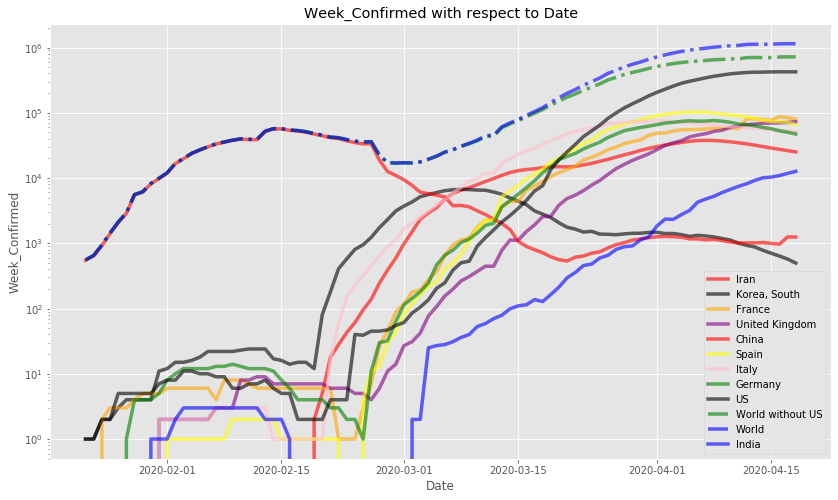

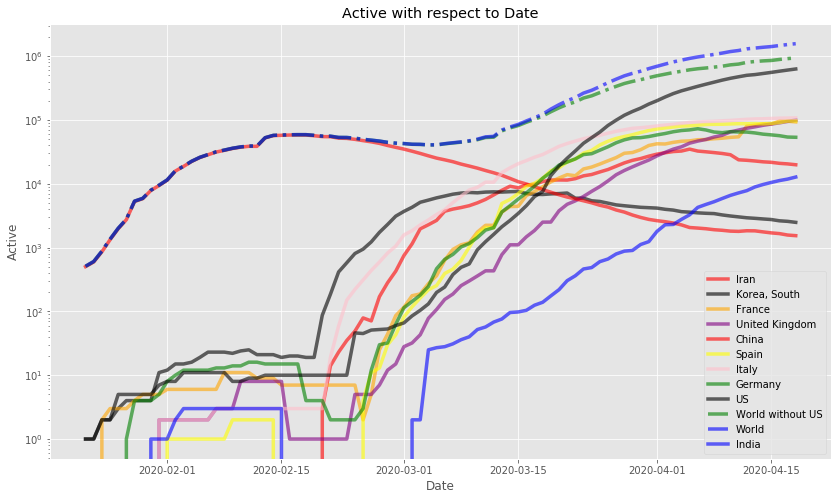

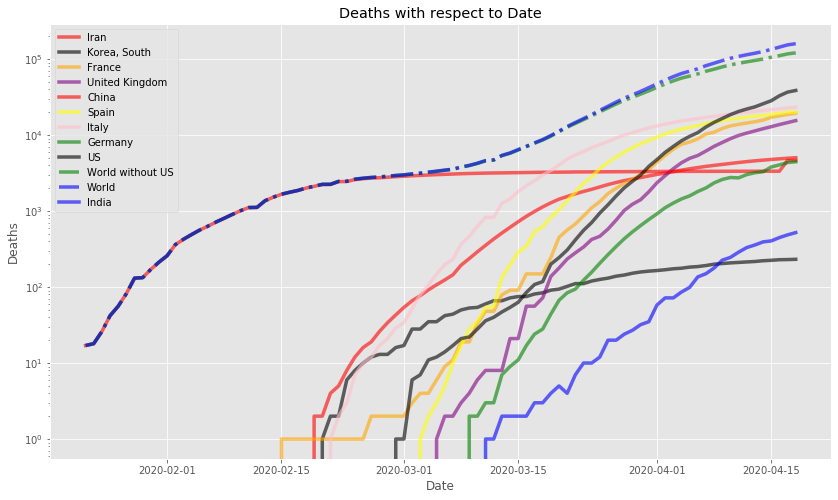

In [24]:
plotwithx('Date', ['Confirmed', 'Week_Confirmed', 'Active', 'Deaths'])

In [25]:
DF_Dict['France']

,Confirmed,Deaths,Recovered,Removed,Active,Mortality,Part_Active,Week_Confirmed,Week_Removed,Week_Recovered,Week_Deaths,Week_Mortality
Date,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-23,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-24,2,0,0,0,2,NaN,1.000000,2,0,0,0,NaN
2020-01-25,3,0,0,0,3,NaN,1.000000,3,0,0,0,NaN
2020-01-26,3,0,0,0,3,NaN,1.000000,3,0,0,0,NaN
2020-01-27,3,0,0,0,3,NaN,1.000000,3,0,0,0,NaN
2020-01-28,4,0,0,0,4,NaN,1.000000,4,0,0,0,NaN
2020-01-29,5,0,0,0,5,NaN,1.000000,5,0,0,0,NaN
2020-01-30,5,0,0,0,5,NaN,1.000000,5,0,0,0,NaN
